In [3]:
import polars as pl
import matplotlib.pyplot as plt
import glob
import numpy as np
import math
import os

In [7]:
pl.read_parquet("/Users/kunkerdthaisong/ipu/ntu_rgb_proj/ntu_rgb/dataframe.parquet")

frame,joint,x,y,z,zone,dis_from_00,dis_from_hop1,angle_from_hop1,file_path
i64,i64,f64,f64,f64,i64,f64,f64,f64,str
1,1,0.2448688,-0.319706,2.583407,5,2.614606,0.065108,1.425857,"""/Users/kunkerd…"
1,2,0.2292261,0.001406,2.560505,5,2.570746,0.322308,7.061175,"""/Users/kunkerd…"
1,3,0.2133683,0.3145366,2.523498,5,2.55196,0.143191,3.139493,"""/Users/kunkerd…"
1,4,0.2640043,0.4484481,2.526233,5,2.579275,0.143191,3.139493,"""/Users/kunkerd…"
1,5,0.077273,0.1855741,2.44758,4,2.455821,0.256173,5.959437,"""/Users/kunkerd…"
1,6,0.021555,-0.062575,2.416886,4,2.417792,0.257683,6.109904,"""/Users/kunkerd…"
1,7,0.095063,-0.304932,2.369344,4,2.390776,0.078768,1.872045,"""/Users/kunkerd…"
1,8,0.1137719,-0.381393,2.366498,4,2.399733,0.067855,1.582087,"""/Users/kunkerd…"
1,9,0.3703793,0.1825166,2.603368,1,2.635909,0.176141,3.460854,"""/Users/kunkerd…"


In [4]:
all_=glob.glob("/Users/kunkerdthaisong/ipu/ntu_rgb_proj/SampleSkeleton/*npy",recursive=True)

In [7]:
VIDEO_ = np.load(all_[0], mmap_mode=None, allow_pickle=True)
shape0, shape1, shape2 = VIDEO_.tolist()['skel_body0'].shape   #shape0==numbe_of_frame ,shape1==3(x,y,z) ,shape2==1
movement1 = VIDEO_.tolist()['skel_body0'].reshape(1, shape0, shape1, shape2, 1)
pos_x,pos_y,pos_z=[],[],[]
joint=[]
frames=[]
f=0
for frame in movement1[0]:#1 frame (25,3,1) , each movement specific frames
    j=0
    f=f+1
    for x,y,z in frame: #position
        pos_x.append(x[0])
        pos_y.append(y[0])
        pos_z.append(z[0])
        j=j+1
        joint.append(j)
        frames.append(f)

df_movement1 = pl.DataFrame({
            'frame': frames,
            'joint': joint,
            'x': pos_x,
            'y': pos_y,
            'z': pos_z
})

In [22]:
def get_dis(x, y, z) -> float:
    return math.sqrt(x**2 + y**2 + z**2)

In [48]:
df_movement1.head()

frame,joint,x,y,z
i64,i64,f64,f64,f64
1,1,0.2448688,-0.319706,2.583407
1,2,0.2292261,0.001406,2.560505
1,3,0.2133683,0.3145366,2.523498
1,4,0.2640043,0.4484481,2.526233
1,5,0.077273,0.1855741,2.44758


In [76]:
df_movement1.map_rows(lambda row:get_dis(row[2],row[3],row[4]))

map
f64
2.614606
2.570746
2.55196
2.579275
2.455821
2.417792
2.390776
2.399733
2.635909


In [92]:
def get_zone(joint)->int:
        for j in range(1,6):
            if(joint in zones.get(j)):
                return j

In [93]:
zones={1:[25,24,12,11,10,9],2:[20,19,18,17],3:[16,15,14,13],4:[23,22,8,7,6,5],5:[1,2,21,3,4]}

In [95]:
df_movement1 = df_movement1.with_columns(pl.Series(name='zone',values=df_movement1['joint'].apply(lambda joint:get_zone(joint))))
df_movement1

/var/folders/b_/lgrfxxx575sg8v5fpdzxfmtm0000gn/T/ipykernel_12201/1341979669.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df_movement1 = df_movement1.with_columns(pl.Series(name='zone',values=df_movement1['joint'].apply(lambda joint:get_zone(joint))))


frame,joint,x,y,z,dis_from_00,zone
i64,i64,f64,f64,f64,f64,i64
1,1,0.2448688,-0.319706,2.583407,2.614606,5
1,2,0.2292261,0.001406,2.560505,2.570746,5
1,3,0.2133683,0.3145366,2.523498,2.55196,5
1,4,0.2640043,0.4484481,2.526233,2.579275,5
1,5,0.077273,0.1855741,2.44758,2.455821,4
1,6,0.021555,-0.062575,2.416886,2.417792,4
1,7,0.095063,-0.304932,2.369344,2.390776,4
1,8,0.1137719,-0.381393,2.366498,2.399733,4
1,9,0.3703793,0.1825166,2.603368,2.635909,1


In [103]:
one="a"
df_movement1=df_movement1.with_columns(pl.Series(f"yoyo{one}",[1]*1450))
df_movement1

frame,joint,x,y,z,dis_from_00,zone,yoyo,yoyoa
i64,i64,f64,f64,f64,f64,i64,i64,i64
1,1,0.2448688,-0.319706,2.583407,2.614606,5,1,1
1,2,0.2292261,0.001406,2.560505,2.570746,5,1,1
1,3,0.2133683,0.3145366,2.523498,2.55196,5,1,1
1,4,0.2640043,0.4484481,2.526233,2.579275,5,1,1
1,5,0.077273,0.1855741,2.44758,2.455821,4,1,1
1,6,0.021555,-0.062575,2.416886,2.417792,4,1,1
1,7,0.095063,-0.304932,2.369344,2.390776,4,1,1
1,8,0.1137719,-0.381393,2.366498,2.399733,4,1,1
1,9,0.3703793,0.1825166,2.603368,2.635909,1,1,1


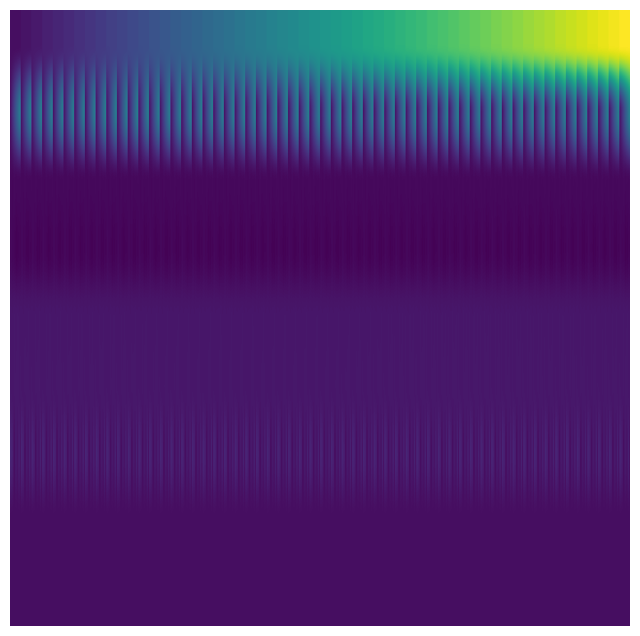

In [117]:
x=df_movement1.to_numpy().T
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(x, cmap='viridis', aspect='auto')
ax.axis('off')
fig.set_size_inches(448 / 56, 448 /56)